<a href="https://colab.research.google.com/github/lakshyarj/lakshyarj/blob/main/Assignment_2(knn).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [22]:
#calculating distance
def Euclidean_distance(x,y):
  return np.sqrt(np.sum((x-y)**2))


In [23]:
from collections import Counter
class KNearestNeighbors:
  """
  calculate  K-Nearest-Neighbor using Euclidean distance

  """
  def __init__(self,k):
    self.k = k
#training function
  def fit(self,x,y):
    self.X_train = x
    self.Y_train = y

  def predict(self, X):
        predicted_labels = [self.predicthelper(x) for x in X]
        return np.array(predicted_labels)

   # helper function
  def predicthelper(self, x):
        # compute the distances between x and all samples in the training set
        distances = [Euclidean_distance(x,x_train) for x_train in self.X_train]

        # get the k nearest samples, labels
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.Y_train[i] for i in k_indices]

        # majority vote
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]


**scatter plot**


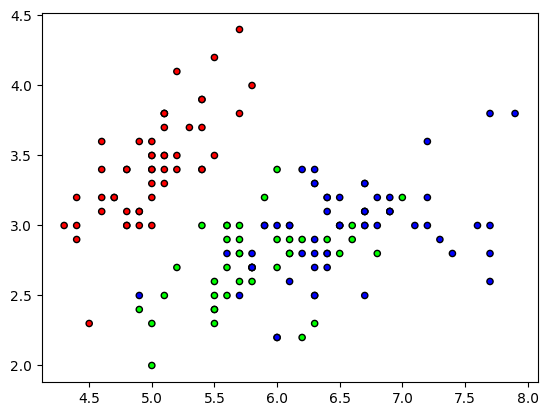

In [24]:
#scatter plot
from matplotlib.colors import ListedColormap
cmap = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=cmap, edgecolor='k', s=20)
plt.show()

**decision boundry**

In [25]:
def decision_boundry(X,Y,k):
  """
  decision boundry

  """
  h = 0.02
  knn = KNearestNeighbors(k)
  knn.fit(X_train,Y_train)
  cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
  cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
  x_min, x_max = X[:,0].min() - .5, X[:,0].max() + .5
  y_min, y_max = X[:,1].min() - .5, X[:,1].max() + .5
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

  # Put the result into a color plot
  Z = Z.reshape(xx.shape)
  plt.figure(1, figsize=(4, 3))
  #plt.set_cmap(plt.cm.Paired)
  plt.pcolormesh(xx, yy, Z,cmap=cmap_light)

  # Plot also the training points
  plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=cmap_bold, edgecolor='k', s=20)


  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
  plt.xticks(())
  plt.yticks(())

  plt.show()

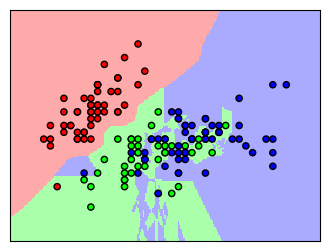

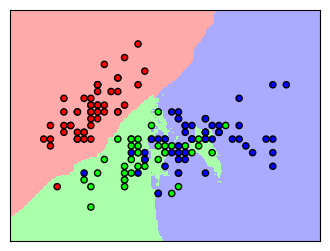

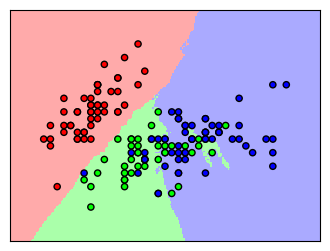

In [27]:
iris = datasets.load_iris()
X,Y = iris.data[:, :2] ,iris.target
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=925)
decision_boundry(X, Y, k=1)
decision_boundry(X, Y, k=5)
decision_boundry(X, Y, k=15)